# Using pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import web scrapped data

url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

#read html
#skip unwated rows
#select important data from web scrapped data

df = pd.read_html(url, skiprows=[1])[0]


In [4]:
#set index

df.set_index("Rank", inplace=True)

In [5]:
#parse data column

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.head()

,Country / Dependency,Region,Population,Percentage of the world,Date,Source (official or from the United Nations),Notes,Unnamed: 8
Rank,,,,,,,,
1,China,Asia,1412600000,NaN,2021-12-31,National annual estimate[2],The population figure refers to mainland China...,NaN
2,India,Asia,1375190050,NaN,2022-04-12,National population clock[3],The figure includes the population of Jammu an...,NaN
3,United States,Americas,332616696,NaN,2022-04-12,National population clock[4],The figure includes the 50 states and the Dist...,NaN
4,Indonesia,Asia[b],272248500,NaN,2021-07-01,National annual estimate[5],NaN,NaN
5,Pakistan,Asia,225199937,NaN,2021-07-01,UN projection[1],The figure excludes the population of Pakistan...,NaN


In [7]:
#drop NaN columns

df.drop(columns = ["Percentage of the world", "Notes", "Unnamed: 8"], inplace = True)

In [8]:
df["Population"].sum()

df["World percentage"] = df["Population"] / df["Population"].sum() *100

df.head(7)

,Country / Dependency,Region,Population,Date,Source (official or from the United Nations),World percentage
Rank,,,,,,
1,China,Asia,1412600000,2021-12-31,National annual estimate[2],18.147748
2,India,Asia,1375190050,2022-04-12,National population clock[3],17.667140
3,United States,Americas,332616696,2022-04-12,National population clock[4],4.273144
4,Indonesia,Asia[b],272248500,2021-07-01,National annual estimate[5],3.497591
5,Pakistan,Asia,225199937,2021-07-01,UN projection[1],2.893156
6,Brazil,Americas,214497254,2022-04-12,National population clock[6],2.755658
7,Nigeria,Africa,211400708,2021-07-01,UN projection[1],2.715876


In [11]:
#Remove "[b]"


df["Region"] = (
                df["Region"].str.replace("[", "")
                .str.replace("b", "")
                .str.replace("]", "")
)

C:\Users\NNAMDI~1\AppData\Local\Temp/ipykernel_9584/3907530405.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Region"].str.replace("[", "")


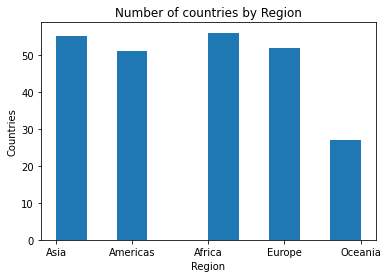

In [12]:
#Visualize

plt.hist(df["Region"])
plt.xlabel("Region")
plt.ylabel("Countries")
plt.title("Number of countries by Region");

In [13]:
#Total population by region

Total_pop_by_region = df.groupby("Region")["Population"].sum().sort_values(ascending=False)
Total_pop_by_region

Region
Asia        4622101218
Africa      1346818556
Americas    1026872486
Europe       744467553
Oceania       43626182
Name: Population, dtype: int64

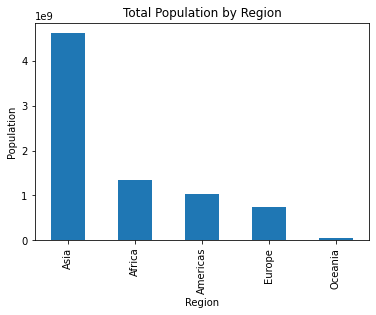

In [14]:
Total_pop_by_region.plot(
                            kind ="bar",
                            xlabel = "Region",
                            ylabel = "Population",
                            title = "Total Population by Region"
                            
);

In [15]:
#mean population by region

mean_pop_by_region = df.groupby("Region")["Population"].mean().sort_values(ascending=False)
mean_pop_by_region

Region
Asia        8.403820e+07
Africa      2.405033e+07
Americas    2.013475e+07
Europe      1.431668e+07
Oceania     1.615785e+06
Name: Population, dtype: float64

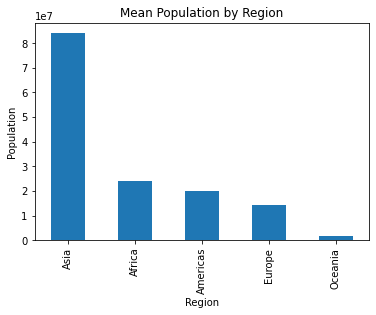

In [16]:
#Bar Chart of the mean population by Region

mean_pop_by_region.plot(
                            kind ="bar",
                            xlabel = "Region",
                            ylabel = "Population",
                            title = "Mean Population by Region"
                            
);

In [17]:
#number of countries in each region

countries_by_region = df.groupby("Region")["Country / Dependency"].count().sort_values(ascending=False)
countries_by_region

Region
Africa      56
Asia        55
Europe      52
Americas    51
Oceania     27
Name: Country / Dependency, dtype: int64

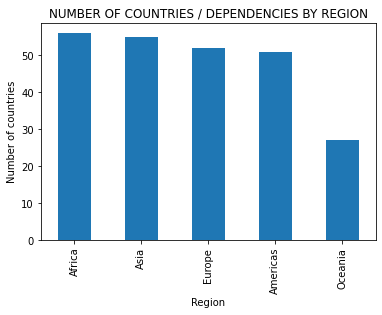

In [18]:
#Bar chart of number of countries in each region

countries_by_region.plot(
                            kind ="bar",
                            xlabel ="Region",
                            ylabel ="Number of countries",
                            title = "NUMBER OF COUNTRIES / DEPENDENCIES BY REGION"
);

In [20]:
mask_african_countries = (df["Region"].str.contains("Africa")) 
df_Africa = df[mask_african_countries]
df_Africa.head(5)

,Country / Dependency,Region,Population,Date,Source (official or from the United Nations),World percentage
Rank,,,,,,
7,Nigeria,Africa,211400708,2021-07-01,UN projection[1],2.715876
12,Ethiopia,Africa,117876000,2021-07-01,UN projection[1],1.514359
14,Egypt,Africa,103157087,2022-04-12,National population clock[12],1.325265
16,DR Congo,Africa,92378000,2021-07-01,UN projection[1],1.186785
23,South Africa,Africa,60142978,2021-07-01,National annual estimate[22],0.772660


In [21]:
mask_Europe = (df["Region"].str.contains("Europe"))
df_Europe = df[mask_Europe]
df_Europe.head(5)


,Country / Dependency,Region,Population,Date,Source (official or from the United Nations),World percentage
Rank,,,,,,
9,Russia,Europe,145478097,2022-01-01,National annual estimate[8],1.868965
19,Germany,Europe,83222442,2021-09-30,National quarterly estimate[16],1.069163
20,France,Europe,67827000,2022-03-01,Monthly national estimate[17],0.871377
21,United Kingdom,Europe,67081000,2020-06-30,National annual estimate[19],0.861793
25,Italy,Europe,58952787,2022-01-31,Monthly national estimate[24],0.757370


In [22]:
mask_Oceania = (df["Region"].str.contains("Oceania"))
df_Oceania = df[mask_Oceania]
df_Oceania.head(5)

,Country / Dependency,Region,Population,Date,Source (official or from the United Nations),World percentage
Rank,,,,,,
53,Australia,Oceania,25980082,2022-04-12,National population clock[50],0.333768
97,Papua New Guinea,Oceania,9122994,2021-07-01,National annual projection[92],0.117204
121,New Zealand,Oceania,5135992,2022-04-12,National population clock[113],0.065982
157,Fiji,Oceania,898402,2021-07-01,National annual projection[92],0.011542
162,Solomon Islands,Oceania,728041,2021-07-01,National annual projection[92],0.009353


In [24]:
df["Population"].min()

40

# Using Beautifulsoup

In [25]:
from bs4 import BeautifulSoup
import requests

In [26]:
#use requests to request or parse the url

html = requests.get(url).text

#2 use BeautifulSoup to parse the HTML

"""
BeautifulSoup is used to parse HTML.

STEPS:

1. Start with soup
    eg:
    soup = BeautifulSoup(url variable, "html.parser")
    
    PRESS ENTER:

"""

soup = BeautifulSoup(html, "html.parser")

#Locate Table

my_table = soup.find("table")



In [27]:
#being specific is another means to find a table in BeautifulSoup

for header in my_table.find_all("th"):
    print(header.text)

Rank
Country / Dependency
Region
Population
Percentage of the world
Date
Source (official or from the United Nations)
Notes

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

–

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

–

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

–

134

135

136

137

138

139

140

141

142

143

144

145

146

147

–

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

–

163

164

–

165

166

167

168

169

170

171

–

172

–

173

174

–

–

–

175

176

177

–

–

–

178

179

–

180

–

181

182

183

184

–

–

185

186


# Scraping Indeed.com

In [28]:
page_start = 10
url_ = f"https://www.indeed.com/jobs?q=Data%20Scientist&l=Los%20Angeles%2C%20CA&explvl=entry_level&sort=date&start={page_start}"

In [29]:
results = []

for page in range(10, 50, 10):
    url_ = f"https://www.indeed.com/jobs?q=Data%20Scientist&l=Los%20Angeles%2C%20CA&explvl=entry_level&sort=date&start={page}"
    
    #request HTML
    html =requests.get(url_).text
    
    #Parse HTMl with BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")

    #Append to list
    results.append(soup)

In [37]:
names = results[1].find_all("span",{"class": "companyName"})

In [38]:
[n.text for n in names]

['Terray Therapeutics',
 'sharethrough',
 'TikTok',
 'Kernel',
 'Accenture',
 'Motional',
 'OffWorld',
 'LegalZoom',
 'FanDuel',
 'Areté',
 'AMP - Auto Motive Power',
 'Insight Research & Trading',
 'Deep 6 AI',
 'Ruggable',
 'Facebook App']